# Math 335 Simulation Take #2

This simulation will model the card game pinochle meld distribution and will calculate the probability of diffrent meld hands occuring. Additionally, data collected from this simulation will allow for conditional probilities to be calculated for diffrent meld hand combinations.

### Deck Makeup
A pinochle deck is diffrent than a traditional card deck. A Pinochle deck (48 cards) is constituded of the following for each suit:
- 2 Nines
- 2 Tens
- 2 Jacks
- 2 Queens
- 2 Kings
- 2 Aces

### Meld Breakdown
For suits of hearts, clubs, dimonds, spades. Pinochle is a trick taking game with a betting phase in order to win the right to call a trump suit. The breakdown of meld points is as follows:
- Marriage: K & Q in any suit = 2 pts
- Half pinochle: (1 Q spades & 1 J dimonds) = 4 pts
- Full pinochle: (2 Q spades & 2 J dimonds) = 30 pts
- Run in trump suit: (A,10,K,Q,J) [Nine optional] = 15 pts
- Hundred Aces: A spades, A hearts, A clubs, A dimonds = 10 pts
- Eighty Kings: K spades, K hearts, K clubs, K dimonds = 8 pts
- Sixty Queens: Q spades, Q hearts, Q clubs, Q dimonds = 6 pts
- Fourty Jacks: J spades, J hearts, J clubs, J dimonds = 4 pts

### Assumptions:
This simulation will assume that a single deck is being used, and that their are four players. 48 possibile cards being distributed evenly among the players. For larger games (P>6) more decks are introduced. For the purpose of this simulation, trump suit and trump suit based point bonuses will be ignored. As such an additional meld hand (9 in trump suit = 1 pt) will be ignored as well because of the lack of trump considerations.

## Functions:
Needed functions for this simulation will be as follows:
- Deal Hands: build deck and deal $$\frac{48_{cards}}{4_{players}} = 12_{cards/player}$$ 
- Check for runs & set trump
- Check for meld combinations add to counters if occurance is present
- Event probability function
- Joint Probability function
- Conditional Probability Definition Function
- Bayes Therom Probability Function

## Import Libaries

In [2]:
import pandas as pd
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

## Set Up Needed Constants / Definitions

In [3]:
values = ["9","J","Q","K","10","A"]*2
Suits = ["S","H","C","D"] # S == Spades, H == Hearts, C == Clubs, D == Dimonds

## Build Deck & Deal Hands:

In [4]:
class Deck:
    def __init__(self):
        self.cards = [value+suit for value in values for suit in Suits] # Etabilisbles
    #shuffle the deck. No return value
    def shuffle(self):
        random.shuffle(self.cards)
    
    #deal the deck to the given number of players. Return as a list of lists
    def deal(self, N_players):
        results = [[] for player in range(N_players)]
        for (index, card) in enumerate(self.cards):
            playerIndex = index % N_players
            results[playerIndex].append(card)
        return results

## Testing Build Deck:

In [5]:
N_players = 4
deck = Deck()
deck.shuffle()
hands = pd.DataFrame(data=deck.deal(N_players),index=["Player"+str(i) for i in range(1,N_players+1)])
hands = hands.T
print(hands)

   Player1 Player2 Player3 Player4
0       QD     10H      AD      JC
1       JS      JD      KS      KD
2       KH      9C      QC     10C
3      10S      QC      AS      JS
4       QS      AH      JH      AH
5       9D      AC     10H      AS
6      10S      9S      AD      JD
7       QH      JH      AC      QD
8       QS      9H      9C      KH
9       JC      9S      KC      QH
10      KC      KS     10D      9H
11     10D      KD     10C      9D


### FUNCTIONS TO CHECK RUN IN EACH SUIT

In [6]:
["AC","10C","KC","QC","JC"]
def checkClubRuns(player_hand, player):
        clubs = ["AC","10C","KC","QC","JC"]
        card = 0
        for i in player_hand[player]:
            for j in clubs:
                if i == j:
                    card +=1
                    clubs.remove(j)
        if card == 5:
            return True
        return False

def checkHeartRuns(player_hand, player):
        hearts = ["AH","10H","KH","QH","JH"]
        card = 0
        for i in player_hand[player]:
            for j in hearts:
                if i == j:
                    card +=1
                    hearts.remove(j)
        if card == 5:
            return True
        return False

def checkSpadesRuns(player_hand, player):
        spades = ["AS","10S","KS","QS","JS"]
        card = 0
        for i in player_hand[player]:
            for j in spades:
                if i == j:
                    card +=1
                    spades.remove(j)
        if card == 5:
            return True
        return False

def checkDimRuns(player_hand, player):
        dim = ["AD","10D","KD","QD","JD"]
        card = 0
        for i in player_hand[player]:
            for j in dim:
                if i == j:
                    card +=1
                    dim.remove(j)
        if card == 5:
            return True
        return False

### TOTAL FUNCTION TO CHECK FOR ANY RUNS

In [7]:
def CheckRuns(hands,player):
    bool_club_runs=checkClubRuns(hands,player)
    bool_heart_runs=checkHeartRuns(hands,player)
    bool_spade_runs=checkSpadesRuns(hands,player)
    bool_dim_runs=checkDimRuns(hands,player)
    return bool_club_runs,bool_heart_runs,bool_spade_runs,bool_dim_runs

### UNIT TEST FOR CHECK RUNS

In [8]:
players=["Player1","Player2","Player3","Player4"]
for player in players:
    print(player)
    bool_club_runs,bool_heart_runs,bool_spade_runs,bool_dim_runs=CheckRuns(hands,player)

Player1
Player2
Player3
Player4


### CHECK FOR MARRIAGE FUNCTIONS:

In [9]:
def checkClubMarriage(player_hand, player):
        clubs = ["KC","QC"]
        #heartsMarriage = True
        card = 0
        for i in player_hand[player]:
            for j in clubs:
                if i == j:
                    card += 1
                    if 2<=card and card<4:
                        clubs.remove(j)
                    
        if card == 2:
            #print("clubs marriage")
            return True
        #print("No clubs marriage")
        return False

def checkHeartMarriage(player_hand, player):
        hearts = ["KH","QH"]
        #heartsMarriage = True
        card = 0
        for i in player_hand[player]:
            for j in hearts:
                if i == j:
                    card += 1
                    if 2<=card and card<4:
                        hearts.remove(j)
                    
        if card == 2:
            #print("hearts marriage")
            return True
        #print("No hearts marriage")
        return False

def checkSpadeMarriage(player_hand, player):
        spades = ["KS","QS"]
        card = 0
        for i in player_hand[player]:
            for j in spades:
                if i == j:
                    card += 1
                    if 2<=card and card<4:
                        spades.remove(j)
                    
        if card == 2:
            #print("Spades marriage")
            return True
        #print("No spades marriage")
        return False

def checkDimMarriage(player_hand, player):
        dims = ["KD","QD"]
        card = 0
        for i in player_hand[player]:
            for j in dims:
                if i == j:
                    card += 1
                    if 2<=card and card<4:
                        dims.remove(j)
                    
        if card == 2:
            #print("Dims marriage")
            return True
        #print("No dims marriage")
        return False

### TOTAL FUNCTION TO CHECK FOR ANY MARRIAGES

In [10]:
def CheckMarriages(hands,player):
    bool_club_mar=checkClubMarriage(hands,player)
    bool_heart_mar=checkHeartMarriage(hands,player)
    bool_spade_mar=checkSpadeMarriage(hands,player)
    bool_dim_mar=checkDimMarriage(hands,player)
    return bool_club_mar,bool_heart_mar,bool_spade_mar,bool_dim_mar

### UNIT TEST FOR CHECK MARRIAGES

In [11]:
players=["Player1","Player2","Player3","Player4"]
for player in players:
    print(player)
    bool_club_mar,bool_heart_mar,bool_spade_mar,bool_dim_mar = CheckMarriages(hands,player)

Player1
Player2
Player3
Player4


### CHECK FOR HUNDRED ACES

In [12]:
def checkHunAces(hands,player):
        aces = ["AS","AD","AC","AH"]
        card = 0
        for i in hands[player]:
            for j in aces:
                if i == j:
                    card += 1
                    if card<4:
                        aces.remove(j)
        if card == 4:
            #print("Hun Aces")
            return True
        #print("No Hun Aces")
        return False

### UNIT TEST FOR CHECK HUN ACES

In [13]:
players=["Player1","Player2","Player3","Player4"]
for player in players:
    bool_hun_aces = checkHunAces(hands,"Player1")

### CHECK FOR EIGHTY KINGS

In [14]:
"KS","KD","KH","KC"
def checkEightKing(hands,player):
        kings = ["KS","KD","KH","KC"]
        card = 0
        for i in hands[player]:
            for j in kings:
                if i == j:
                    card += 1
                    if card<4:
                        kings.remove(j)
        if card == 4:
            return True
        return False

### UNIT TEST FOR CHECK EIGHTY KINGS

In [15]:
players=["Player1","Player2","Player3","Player4"]
for player in players:
    bool_check_eight_kings = checkEightKing(hands,player)

### CHECK FOR SIXTY QUEENS

In [16]:
def checkSixQueen(hands,player):
        queens = ["QS","QD","QH","QC"]
        card = 0
        for i in hands[player]:
            for j in queens:
                if i == j:
                    card += 1
                    if card<4:
                        queens.remove(j)
        if card == 4:
            #print("Sixty Queens")
            return True
        #print("No Sixty Queens")
        return False

### UNIT TEST FOR CHECK SIXTY QUEENS

In [17]:
players=["Player1","Player2","Player3","Player4"]
for player in players:
    print(player)
    bool_check_six_queens = checkSixQueen(hands,player)

Player1
Player2
Player3
Player4


### CHECK FOR FOURTY JACKS

In [18]:
"JS","JD","JH","JC"
def checkFourJacks(hands,player):
        jacks = ["JS","JD","JH","JC"]
        card = 0
        for i in hands[player]:
            for j in jacks:
                if i == j:
                    card += 1
                    if card<4:
                        jacks.remove(j)
        if card == 4:
            #print("Fourty Jacks")
            return True
        #print("No Fourty Jacks")
        return False

### UNIT TEST FOR CHECK FOR FOURTY JACKS

In [19]:
players=["Player1","Player2","Player3","Player4"]
for player in players:
    print(player)
    bool_check_four_queen = checkFourJacks(hands,player)

Player1
Player2
Player3
Player4


### CHECK FOR PINOCHLE / HALF PINOCHLE

In [20]:
# TUPLE: {half Pin}, {full pin}
def checkPin(hands,player):
        pin = ["QS","JD","QS","JD"]
        card = 0
        for i in hands[player]:
            for j in pin:
                if i == j:
                    card += 1
                    pin.remove(j)
        if card==4:
            return True
        return False
def checkHalfPin(hands,player):
        halfpin = ["QS","JD"]
        card = 0
        for i in hands[player]:
            for j in halfpin:
                if i==j:
                    card+=1
                    #print(card)
                    halfpin.remove(j)
        if card==2:
            return True
        return False

### UNIT TEST CHECK FOR PINOCHLE

In [21]:
players=["Player1","Player2","Player3","Player4"]
for player in players:
    print(player)
    bool_check_pin = checkPin(hands,player)

Player1
Player2
Player3
Player4


## INITIAL SIMULATION:

### Purpose of Initial Simulation:
This is initial simulation will record counters for the occurance of each meld hand. From here probability that each event will be calculated by dividing the number of occurances of each meld hand by the number of simulations.

In [22]:
N_sim = 10000 # Number of simulations we want to record
N_players = 4
players=["Player1","Player2","Player3","Player4"]
# Initialize Counters
c_run_count = 0
d_run_count = 0
h_run_count = 0
s_run_count = 0
run_count = 0
mar_count = 0
c_mar_count = 0
d_mar_count = 0
h_mar_count = 0
s_mar_count = 0
hun_aces_count = 0
eight_king_count = 0
sixty_queen_count = 0
fourty_jack_count = 0
half_pin_count = 0
pin_count = 0

# initialize deck
deck_sim = Deck()
for i in tqdm(range(0,N_sim)):
    deck_sim = Deck()
    deck_sim.shuffle()
    hands_sim = pd.DataFrame(data=deck_sim.deal(N_players),index=["Player"+str(i) for i in range(1,N_players+1)])
    hands_sim = hands_sim.T
    #print(hands_sim)
    player_scores = [0,0,0,0]
    player_index = 0
    for player in players:
        bool_club_runs,bool_heart_runs,bool_spade_runs,bool_dim_runs=CheckRuns(hands_sim,player)
        #print(bool_club_runs)
        bool_club_mar,bool_heart_mar,bool_spade_mar,bool_dim_mar = CheckMarriages(hands_sim,player)
        bool_hun_aces = checkHunAces(hands_sim,player)
        bool_check_eight_kings = checkEightKing(hands_sim,player)
        bool_check_six_queens = checkSixQueen(hands_sim,player)
        bool_check_four_jack = checkFourJacks(hands_sim,player)
        bool_check_half_pin = checkHalfPin(hands_sim,player)
        bool_check_full_pin = checkPin(hands_sim,player)
        if bool_club_runs:
            c_run_count+=1
            c_mar_count-=1 # subtracting from mariage count so we don't double count in the occurance of a run
            #print(c_run_count)
        if bool_heart_runs:
            h_run_count +=1
            h_mar_count -=1
            #print(h_run_count)
        if bool_spade_runs:
            s_run_count +=1
            s_mar_count -=1
            #print(s_run_count)
        if bool_dim_runs:
            d_run_count +=1
            d_mar_count -=1
            #print(d_run_count)
        if bool_club_mar:
            c_mar_count+=1
        if bool_heart_mar:
            h_mar_count+=1
            #print(h_mar_count)
        if bool_spade_mar:
            s_mar_count+=1
        if bool_dim_mar:
            d_mar_count+=1
        if bool_hun_aces:
            hun_aces_count+=1
        if bool_check_eight_kings:
            eight_king_count+=1
        if bool_check_six_queens:
            sixty_queen_count+=1
        if bool_check_four_jack:
            fourty_jack_count+=1
        if bool_check_half_pin:
            half_pin_count+=1
        if bool_check_full_pin:
            pin_count+=1
        if bool_check_full_pin and bool_check_half_pin:
            #print(half_pin_count)
            half_pin_count=half_pin_count-1
        
        #player_scores[player_index] = score
               

100%|██████████| 10000/10000 [00:14<00:00, 696.51it/s]


### Aggegrate Results
Totals number of occurances of each meld hand and calculates probability of each meld hand

In [23]:
total_runs = c_run_count+h_run_count+s_run_count+d_run_count
total_marriages = s_mar_count+c_mar_count+h_mar_count+d_mar_count
raw_results = [c_run_count,h_run_count,s_run_count,d_run_count,
               c_mar_count,h_mar_count,s_mar_count,d_mar_count,
               hun_aces_count,eight_king_count,sixty_queen_count,fourty_jack_count,
               half_pin_count,pin_count]
prob = []
for result in raw_results:
    prob.append(result / N_sim)
expected_occurance = []
#for 
#prob = occurance/N_sim for occurance in raw_results
results={"Occurances":raw_results,"Probabilities":prob}
index = ["Clubs Runs","Hearts Runs","Spades Runs","Dimonds Runs",
         "Clubs Marriage","Hearts Marriage","Spades Marriage","Dimonds Marriage",
        "Hundred Aces","Eighty Kings","Sixty Queens","Forty Jacks",
        "Half Pinochle", "Full Pinochle"]
df = pd.DataFrame(data=results,index=index)
print(df)

                  Occurances  Probabilities
Clubs Runs               418         0.0418
Hearts Runs              392         0.0392
Spades Runs              373         0.0373
Dimonds Runs             404         0.0404
Clubs Marriage          8616         0.8616
Hearts Marriage         8701         0.8701
Spades Marriage         8803         0.8803
Dimonds Marriage        8618         0.8618
Hundred Aces            1095         0.1095
Eighty Kings            1019         0.1019
Sixty Queens            1064         0.1064
Forty Jacks             1062         0.1062
Half Pinochle           6695         0.6695
Full Pinochle            644         0.0644


## CONDITIONAL PROBABILITY SIMULATION:

This simulation will total the joint probabilities of certain events for example: (100 Aces && a run in clubs||hearts||dimonds||spades)

In [24]:
N_sim = 10000 # Number of simulations we want to record
N_players = 4
players=["Player1","Player2","Player3","Player4"]
# Initialize Counters
c_run_count = 0
d_run_count = 0
h_run_count = 0
s_run_count = 0
run_count = 0
mar_count = 0
c_mar_count = 0
d_mar_count = 0
h_mar_count = 0
s_mar_count = 0
hun_aces_count = 0
eight_king_count = 0
sixty_queen_count = 0
fourty_jack_count = 0
half_pin_count = 0
pin_count = 0
hun_aces_and_run_count = 0
hun_aces_and_eight_king_count = 0
pin_count_and_sixty_queen_count = 0
total_run_count = 0
total_mar_count = 0
spades_run_full_pin_count=0
spades_run_half_pin_count=0
dims_run_full_pin_count=0
dims_run_half_pin_count=0

# initialize deck
deck_sim = Deck()
for i in tqdm(range(0,N_sim)):
    deck_sim = Deck()
    deck_sim.shuffle()
    hands_sim = pd.DataFrame(data=deck_sim.deal(N_players),index=["Player"+str(i) for i in range(1,N_players+1)])
    hands_sim = hands_sim.T
    #print(hands_sim)
    player_scores = [0,0,0,0]
    player_index = 0
    for player in players:
        bool_club_runs,bool_heart_runs,bool_spade_runs,bool_dim_runs=CheckRuns(hands_sim,player)
        #print(bool_club_runs)
        bool_club_mar,bool_heart_mar,bool_spade_mar,bool_dim_mar = CheckMarriages(hands_sim,player)
        bool_hun_aces = checkHunAces(hands_sim,player)
        bool_check_eight_kings = checkEightKing(hands_sim,player)
        bool_check_six_queens = checkSixQueen(hands_sim,player)
        bool_check_four_jack = checkFourJacks(hands_sim,player)
        bool_check_half_pin = checkHalfPin(hands_sim,player)
        bool_check_full_pin = checkPin(hands_sim,player)
        if bool_club_runs:
            c_run_count+=1
            c_mar_count-=1 # subtracting from mariage count so we don't double count in the occurance of a run
            total_run_count+=1
            #print(c_run_count)
        if bool_heart_runs:
            h_run_count +=1
            h_mar_count -=1
            total_run_count+=1
            #print(h_run_count)
        if bool_spade_runs:
            s_run_count +=1
            s_mar_count -=1
            total_run_count+=1
            #print(s_run_count)
        if bool_dim_runs:
            d_run_count +=1
            d_mar_count -=1
            total_run_count+=1
            #print(d_run_count)
        if bool_club_mar:
            c_mar_count+=1
            total_mar_count+=1
        if bool_heart_mar:
            h_mar_count+=1
            total_mar_count+=1
            #print(h_mar_count)
        if bool_spade_mar:
            s_mar_count+=1
            total_mar_count+=1
        if bool_dim_mar:
            d_mar_count+=1
            total_mar_count+=1
        if bool_hun_aces:
            hun_aces_count+=1
        if bool_check_eight_kings:
            eight_king_count+=1
        if bool_check_six_queens:
            sixty_queen_count+=1
        if bool_check_four_jack:
            fourty_jack_count+=1
        if bool_check_half_pin:
            half_pin_count+=1
        if bool_check_full_pin:
            pin_count+=1
        if bool_check_full_pin and bool_check_half_pin:
            #print(half_pin_count)
            half_pin_count=half_pin_count-1
        if (bool_hun_aces and bool_club_runs) or (bool_hun_aces and bool_spade_runs) or (bool_hun_aces and bool_dim_runs) or (bool_hun_aces and bool_heart_runs):
            hun_aces_and_run_count +=1
#         if (bool_hun_aces and bool_check_eight_kings):
#             hun_aces_and_eight_king_count +=1
        if (bool_check_full_pin and bool_spade_runs):
            spades_run_full_pin_count +=1
        if bool_check_half_pin and bool_spade_runs:
            spades_run_half_pin_count+=1
        if bool_check_full_pin and bool_dim_runs:
            dims_run_full_pin_count+=1
        if bool_check_half_pin and bool_dim_runs:
            dims_run_half_pin_count+=1
        if bool_check_full_pin and bool_check_six_queens:
            pin_count_and_sixty_queen_count +=1 

100%|██████████| 10000/10000 [00:14<00:00, 669.28it/s]


In [25]:
#total_runs = c_run_count+h_run_count+s_run_count+d_run_count
total_marriages = s_mar_count+c_mar_count+h_mar_count+d_mar_count
raw_results = [c_run_count,h_run_count,s_run_count,d_run_count,total_run_count/4,
               c_mar_count,h_mar_count,s_mar_count,d_mar_count,total_mar_count/4,
               hun_aces_count,eight_king_count,sixty_queen_count,fourty_jack_count,
               half_pin_count,pin_count,
               hun_aces_and_run_count,hun_aces_and_eight_king_count,pin_count_and_sixty_queen_count,
               spades_run_full_pin_count,spades_run_half_pin_count,dims_run_full_pin_count,dims_run_half_pin_count
              ]
prob = []
for result in raw_results:
    prob.append(result / N_sim)
expected_occurance = []
#for 
#prob = occurance/N_sim for occurance in raw_results
results={"Occurances":raw_results,"Probabilities":prob}
index = ["Clubs Runs","Hearts Runs","Spades Runs","Dimonds Runs","Total Runs",
         "Clubs Marriage","Hearts Marriage","Spades Marriage","Dimonds Marriage","Total Marriages",
        "Hundred Aces","Eighty Kings","Sixty Queens","Forty Jacks",
        "Half Pinochle", "Full Pinochle","Hun Aces & Run", "Hun Aces & Eighty Kings","Pinchole & Sixty Queens",
         "Spades Run & Full Pinochle", "Spades Run & Half Pinochle","Dimonds Run & Full Pinochle", "Dimonds Run & Half Pinochle"]
df = pd.DataFrame(data=results,index=index)
print(df)

                             Occurances  Probabilities
Clubs Runs                       398.00       0.039800
Hearts Runs                      382.00       0.038200
Spades Runs                      394.00       0.039400
Dimonds Runs                     335.00       0.033500
Total Runs                       377.25       0.037725
Clubs Marriage                  8754.00       0.875400
Hearts Marriage                 8694.00       0.869400
Spades Marriage                 8720.00       0.872000
Dimonds Marriage                8656.00       0.865600
Total Marriages                 9083.25       0.908325
Hundred Aces                    1059.00       0.105900
Eighty Kings                    1088.00       0.108800
Sixty Queens                    1065.00       0.106500
Forty Jacks                     1046.00       0.104600
Half Pinochle                   6849.00       0.684900
Full Pinochle                    627.00       0.062700
Hun Aces & Run                    33.00       0.003300
Hun Aces &

## Calculating Conditional Probabilities

Conditional probabilities are defined as the following:
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$
where P(A|B) is the probability of event A occuring givent that event B has occured. P(A n B) is the probability the events A and B both occur. This calculation will be preformed for multiple intresting meld hand combinations. P(A n B) has been determined through counters in the simulaton for dependent events, and will be determined through the definition of the multliplcation rule for indepent events which reads:
$$ P(A \cap B) = P(A) * P(B) $$
Using our counters and the multiplation rule intresting conditional probabilities can be calculated.

### Conditional Probability Function:

In [26]:
def ConditionalProb(prob_B, joint_prob):
    conditional = joint_prob/prob_B
    return conditional

### Unit Test For Conditional Probability Function:

In [27]:
prob_sixty_queens = df.at["Sixty Queens", "Probabilities"]
prob_joint_pin_sixty_queens = df.at["Pinchole & Sixty Queens", "Probabilities"]
Pin_given_sixty_queens = ConditionalProb(prob_sixty_queens,prob_joint_pin_sixty_queens)
print(Pin_given_sixty_queens)

0.018779342723004695


### Joint Probability For Indepent Events Function:

In [28]:
def JointIndepentEvents(prob_A,prob_B):
    jointIndepentEvents = prob_A*prob_B
    return jointIndepentEvents

### Unit Test For Joint Indepent Events:

In [29]:
prob_mar_clubs = df.at["Clubs Marriage","Probabilities"]
prob_mar_hearts = df.at["Hearts Marriage","Probabilities"]
clubs_and_hearts_joint_marriage = JointIndepentEvents(prob_mar_clubs,prob_mar_hearts)
print(clubs_and_hearts_joint_marriage)

0.7610727599999999


## Conditional Probability Data Frame(s)
Now that we have a function that works to calculate conditional and any indepenent joint probabilites we will create a data frame showing the conditional probabilities of diffrent meld combinations.

In [30]:
# Data frame examining a pinochle or half pinochle given that a run in dimonds or a run in clubs
probs = "Probabilities"
prob_half_pin = df.at["Half Pinochle",probs]
prob_full_pin = df.at["Full Pinochle",probs]
prob_spade_run = df.at["Spades Runs",probs]
prob_dim_run = df.at["Dimonds Runs",probs]
prob_half_and_spades_run = df.at["Spades Run & Half Pinochle",probs]
prob_full_and_spades_run = df.at["Spades Run & Full Pinochle",probs]
prob_half_and_dim_run = df.at["Dimonds Run & Half Pinochle",probs]
prob_full_and_dim_run = df.at["Dimonds Run & Full Pinochle",probs]
half_pin_given_spade_run = ConditionalProb(prob_spade_run,prob_half_and_spades_run)
full_pin_given_spade_run = ConditionalProb(prob_spade_run,prob_full_and_spades_run)
half_pin_given_dim_run = ConditionalProb(prob_dim_run,prob_half_and_dim_run)
full_pin_given_dim_run = ConditionalProb(prob_dim_run,prob_full_and_dim_run)

conditional_probs_pins = {"Conditional Probabilities":[half_pin_given_spade_run,full_pin_given_spade_run,
                                                       half_pin_given_dim_run,full_pin_given_dim_run]}
index_pins = ["Half Pinochle Given Spade Run", "Full Pinochle Given Spade Run",
              "Half Pinochle Given Dimonds Run","Full Pinochle Given Dimonds Run"]
df_pin_conditionals = pd.DataFrame(data = conditional_probs_pins,index = index_pins)
print(df_pin_conditionals)

                                 Conditional Probabilities
Half Pinochle Given Spade Run                     0.299492
Full Pinochle Given Spade Run                     0.010152
Half Pinochle Given Dimonds Run                   0.328358
Full Pinochle Given Dimonds Run                   0.023881


In [31]:
# Data frame examining a hun aces given a run of any suit
joint_hun_aces_and_run = df.at["Hun Aces & Run",probs]
prob_run_any_suit = df.at["Total Runs",probs]
hun_aces_given_run = ConditionalProb(prob_run_any_suit,joint_hun_aces_and_run)
conditional_prob_hun_aces = {"Conditional Probabilities":[hun_aces_given_run]}
index_hun_aces = ["Hundred Aces Given Run of Any Suit"]
df_hun_aces = pd.DataFrame(data = conditional_prob_hun_aces,index = index_hun_aces)
print(df_hun_aces)

                                    Conditional Probabilities
Hundred Aces Given Run of Any Suit                   0.087475


In [32]:
# Data frame examining a run given a marriage in that suit
prob_club_run = df.at["Clubs Runs",probs]
prob_spade_run = df.at["Spades Runs",probs]
prob_hearts_run = df.at["Hearts Runs",probs]
prob_dim_run = df.at["Dimonds Runs",probs]

prob_club_mar = df.at["Clubs Marriage",probs]
prob_hearts_mar = df.at["Hearts Marriage",probs]
prob_spades_mar = df.at["Spades Marriage",probs]
prob_dim_mar = df.at["Dimonds Marriage",probs]

club_run_given_club_mar = ConditionalProb(prob_club_mar,prob_club_run)
spade_run_given_spade_mar = ConditionalProb(prob_spades_mar,prob_spade_run)
heart_run_given_heart_mar = ConditionalProb(prob_hearts_mar,prob_hearts_run)
dim_run_given_dim_mar = ConditionalProb(prob_dim_mar,prob_dim_run)

conditional_prob_runs= {"Conditional Probabilities":[club_run_given_club_mar,spade_run_given_spade_mar,
                                                          heart_run_given_heart_mar,dim_run_given_dim_mar]}
index_runs = ["Club Run Given Club Marriage","Spade Run Given Spade Marriage",
              "Heart Run Given Heart Marriage","Dimond Run Given Dimond Marriage"]
df_runs = pd.DataFrame(data = conditional_prob_runs,index = index_runs)
print(df_runs)

                                  Conditional Probabilities
Club Run Given Club Marriage                       0.045465
Spade Run Given Spade Marriage                     0.045183
Heart Run Given Heart Marriage                     0.043938
Dimond Run Given Dimond Marriage                   0.038701


In [33]:
# Data Frames to calculate likely hood of getting a marriage in a diffrent suit given a you have one in a clubs 
# Independnt events all combinations are indepent events so we will assume that prob will be same as given CM for any other given marriage

prob_club_mar = df.at["Clubs Marriage",probs]
prob_hearts_mar = df.at["Hearts Marriage",probs]
prob_spades_mar = df.at["Spades Marriage",probs]
prob_dim_mar = df.at["Dimonds Marriage",probs]

joint_club_heart_mar = JointIndepentEvents(prob_club_mar,prob_hearts_mar)
joint_club_spade_mar = JointIndepentEvents(prob_club_mar,prob_spades_mar)
joint_club_dim_mar = JointIndepentEvents(prob_club_mar,prob_dim_mar)

heart_mar_given_CM = ConditionalProb(prob_club_mar,joint_club_heart_mar)
spade_mar_given_CM = ConditionalProb(prob_club_mar,joint_club_spade_mar)
dim_mar_given_CM = ConditionalProb(prob_club_mar,joint_club_dim_mar)

Conditional_prob_mar= {"Conditional Probabilities":[heart_mar_given_CM,spade_mar_given_CM,dim_mar_given_CM]}
index_mar = ["Heart Marriage Given Club Marriage","Spade Marriage Given Club Marriage",
              "Dimond Marriage Given Club Marriage"]
df_mar = pd.DataFrame(data = Conditional_prob_mar,index = index_mar)
print(df_mar)

                                     Conditional Probabilities
Heart Marriage Given Club Marriage                      0.8694
Spade Marriage Given Club Marriage                      0.8720
Dimond Marriage Given Club Marriage                     0.8656


In [34]:
# Full Data Frame of Conditional probabilities
frames = [df_runs,df_hun_aces,df_pin_conditionals]
conditional_probabilities = pd.concat(frames)
print(conditional_probabilities)

                                    Conditional Probabilities
Club Run Given Club Marriage                         0.045465
Spade Run Given Spade Marriage                       0.045183
Heart Run Given Heart Marriage                       0.043938
Dimond Run Given Dimond Marriage                     0.038701
Hundred Aces Given Run of Any Suit                   0.087475
Half Pinochle Given Spade Run                        0.299492
Full Pinochle Given Spade Run                        0.010152
Half Pinochle Given Dimonds Run                      0.328358
Full Pinochle Given Dimonds Run                      0.023881


### Bar Chart Plotting Conditional Probabilities

Text(0, 0.5, 'Probability of Conditional Event')

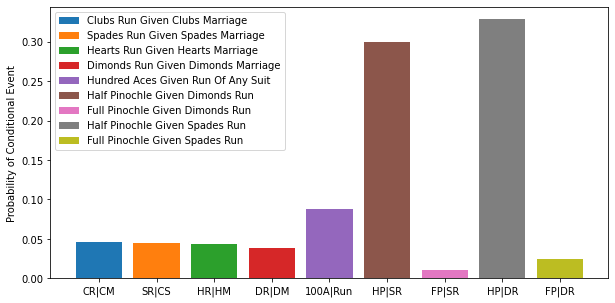

In [35]:
conditional_prob_index = conditional_probabilities.index.to_list()
x_axis = ["CR|CM","SR|CS","HR|HM","DR|DM","100A|Run","HP|SR","FP|SR","HP|DR","FP|DR"]
f,ax=plt.subplots(figsize=(10,5))
plt.bar(x_axis[0],conditional_probabilities["Conditional Probabilities"][0],width=.8,label="Clubs Run Given Clubs Marriage")
plt.bar(x_axis[1],conditional_probabilities["Conditional Probabilities"][1],width=.8,label="Spades Run Given Spades Marriage")
plt.bar(x_axis[2],conditional_probabilities["Conditional Probabilities"][2],width=.8, label="Hearts Run Given Hearts Marriage")
plt.bar(x_axis[3],conditional_probabilities["Conditional Probabilities"][3],width=.8, label = "Dimonds Run Given Dimonds Marriage")
plt.bar(x_axis[4],conditional_probabilities["Conditional Probabilities"][4],width=.8, label = "Hundred Aces Given Run Of Any Suit")
plt.bar(x_axis[5],conditional_probabilities["Conditional Probabilities"][5],width=.8, label = "Half Pinochle Given Dimonds Run")
plt.bar(x_axis[6],conditional_probabilities["Conditional Probabilities"][6],width=.8, label="Full Pinochle Given Dimonds Run")
plt.bar(x_axis[7],conditional_probabilities["Conditional Probabilities"][7],width=.8, label="Half Pinochle Given Spades Run")
plt.bar(x_axis[8],conditional_probabilities["Conditional Probabilities"][8],width=.8, label="Full Pinochle Given Spades Run")
ax.legend()
ax.set_ylabel("Probability of Conditional Event")

## Bayes Therom: 

We can make use of bayes therom in order to determine the counter part of our conditional probilities. Bayes therom is defined as $$ P(A|B) = \frac{P(B|A)*P(A)}{P(B)} $$ which we can now utilize because we know one of the conditional probabilities and the probabilities of what would be event A and event B. Due to the fact that a run constitues a marriage we will neglect any marriage given run calculations and instead focus on the following events: Run|100A,SR|HP,FP|SR,DR|HP,DR,FP

### Bayes Therom Function:

In [51]:
def BayesTherom(P_b_a, P_a, P_b):
    P_A_given_B = P_b_a*P_a/P_b
    return P_A_given_B

### Unit Test For Bayes Therom

In [52]:
pro_hundred_aces = df.at["Hundred Aces",probs]
hun_aces_given_run = ConditionalProb(prob_run_any_suit,joint_hun_aces_and_run)
#conditional_prob_hun_aces = {"Conditional Probabilities":[hun_aces_given_run]}
hun_A_given_run = BayesTherom(hun_aces_given_run,prob_run_any_suit,pro_hundred_aces)


In [65]:
# Data Frame of additional conditional probabilities
pro_hundred_aces = df.at["Hundred Aces",probs]
hun_aces_given_run = ConditionalProb(prob_run_any_suit,joint_hun_aces_and_run)
#conditional_prob_hun_aces = {"Conditional Probabilities":[hun_aces_given_run]}
run_given_HunAces = BayesTherom(hun_aces_given_run,prob_run_any_suit,pro_hundred_aces)

prob_half_pin = df.at["Half Pinochle",probs]
prob_full_pin = df.at["Full Pinochle",probs]

half_pin_given_spade_run = ConditionalProb(prob_spade_run,prob_half_and_spades_run)
full_pin_given_spade_run = ConditionalProb(prob_spade_run,prob_full_and_spades_run)
half_pin_given_dim_run = ConditionalProb(prob_dim_run,prob_half_and_dim_run)
full_pin_given_dim_run = ConditionalProb(prob_dim_run,prob_full_and_dim_run)

prob_spades_run = df.at["Spades Runs",probs]
prob_dim_run = df.at["Dimonds Runs",probs]

prob_SR_given_HP = BayesTherom(half_pin_given_spade_run,prob_spades_run,prob_half_pin)
#print(prob_SR_given_HP)
prob_SR_given_FP = BayesTherom(full_pin_given_spade_run,prob_spades_run,prob_full_pin)

prob_DR_given_HP = BayesTherom(half_pin_given_dim_run,prob_dim_run,prob_half_pin)
prob_DR_given_FP = BayesTherom(full_pin_given_dim_run,prob_dim_run,prob_full_pin)


Conditional_prob_bayes= {"Conditional Probabilities":[run_given_HunAces,prob_SR_given_HP,prob_SR_given_FP,
                                                      prob_DR_given_HP,prob_DR_given_FP]}
index_bayes = ["Run (any suit) Given Hundred Aces","Spades Run Given Half Pinochle","Spades Run Given Full Pinochle",
            "Dimonds Run Given Half Pinochle","Dimonds Run Given Full Pinochle"]
df_bayes = pd.DataFrame(data = Conditional_prob_bayes,index = index_bayes)
print(df_bayes)

                                   Conditional Probabilities
Run (any suit) Given Hundred Aces                   0.031161
Spades Run Given Half Pinochle                      0.017229
Spades Run Given Full Pinochle                      0.006380
Dimonds Run Given Half Pinochle                     0.016061
Dimonds Run Given Full Pinochle                     0.012759


Text(0, 0.5, 'Probability of Conditional Event')

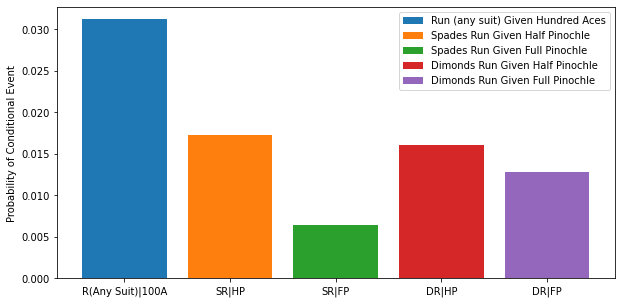

In [66]:
bayes_index = df_bayes.index.to_list()
x_axis = ["R(Any Suit)|100A","SR|HP","SR|FP","DR|HP","DR|FP"]
f,ax=plt.subplots(figsize=(10,5))
plt.bar(x_axis[0],df_bayes["Conditional Probabilities"][0],width=.8,label=bayes_index[0])
plt.bar(x_axis[1],df_bayes["Conditional Probabilities"][1],width=.8,label=bayes_index[1])
plt.bar(x_axis[2],df_bayes["Conditional Probabilities"][2],width=.8, label=bayes_index[2])
plt.bar(x_axis[3],df_bayes["Conditional Probabilities"][3],width=.8, label=bayes_index[3])
plt.bar(x_axis[4],df_bayes["Conditional Probabilities"][4],width=.8, label=bayes_index[4])
ax.legend()
ax.set_ylabel("Probability of Conditional Event")